In [1]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import denaturationpy as dp

from plotnine import *

In [2]:
system = dp.System(273.3+40)
fgf2_concentration = dp.FGF2Concentration('fgf2', system,
    agg_Ea=264500, agg_Tf=347.6, misfold_prob=0.9)
fgf2_concentration.set_initial(10,0,0)
urea_concentration = dp.FixedConcentration('urea', 0)
fgf2_concentration.add_denaturant(urea_concentration, -8745)
fgf2_concentration.kf2_enthalpy = 34000
system.add_concentration(fgf2_concentration)
system.add_concentration(urea_concentration)

In [3]:
data = pd.DataFrame()
ureas = np.linspace(0, 1, 5)
temperatures = list(range(30, 36))
for t in temperatures:
    for urea in ureas:
        system.t = 0
        system.y = system.y0()
        system.temperature = 273 + t
        urea_concentration.c0 = urea
        result = system.solve(60*60, 1000, method='LSODA')
        result['temperature'] = t
        data = data.append(result, ignore_index=True)

/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Urea Dependent Equilibration.png


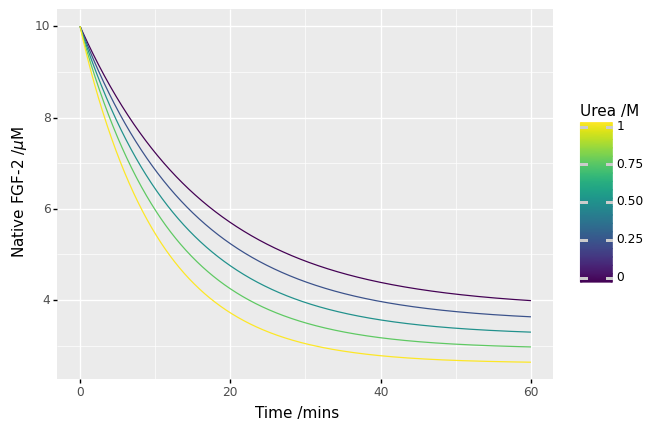

<ggplot: (8732018211310)>

In [4]:
r = data.query('temperature==30')
r = r[['t', 'fgf2_native', 'urea']].melt(['t', 'urea'])
r['t'] /= 60
p = (
    ggplot(r, aes(x='t', y='value', group='urea', colour='urea')) +
    geom_line() +
    xlab('Time /mins') + ylab(r'Native FGF-2 /$\mu $M') +
    labs(colour='Urea /M') + theme(legend_direction='vertical')
)
p.save('Paper Figures/Urea Dependent Equilibration.png')
p

/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Temperature Dependent Equilibration.png


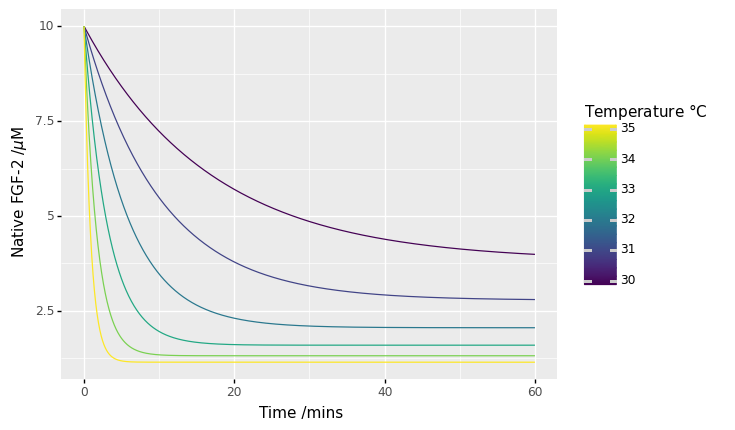

<ggplot: (8732018211319)>

In [5]:
r = data.query('urea==0')
r = r[['t', 'fgf2_native', 'temperature']].melt(['t', 'temperature'])
r['t'] /= 60
p = (
    ggplot(r, aes(x='t', y='value', group='temperature', colour='temperature')) +
    geom_line() +
    xlab('Time /mins') + ylab(r'Native FGF-2 $/\mu $M') +
    labs(colour=r'Temperature $\degree$C')
)
p.save('Paper Figures/Temperature Dependent Equilibration.png')
p

In [6]:
data2 = pd.DataFrame()
ureas = np.linspace(0, 1, 5)
temperatures = list(range(30, 41))
for t in temperatures:
    for urea in ureas:
        system.t = 0
        system.y = system.y0()
        system.temperature = 273 + t
        urea_concentration.c0 = urea
        result = system.solve(24*60*60, 1000, method='LSODA')
        result['temperature'] = t
        data2 = data2.append(result, ignore_index=True)

/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: Paper Figures/Aggregation.png
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
/home/sabsr3/.local/lib/python3.8/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


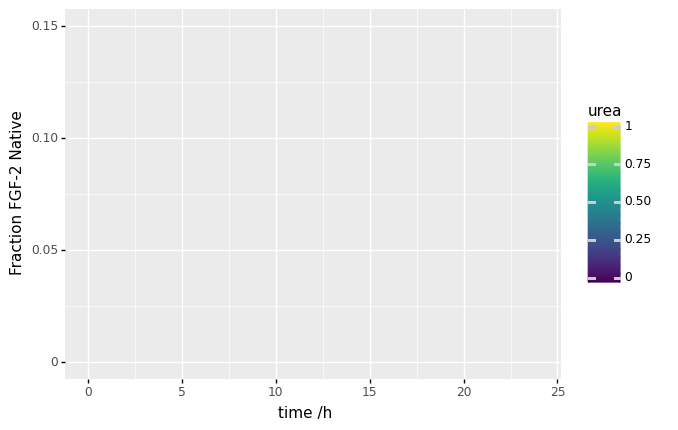

<ggplot: (8732015691370)>

In [7]:
r = data2.query('temperature==35')
r = r[['t', 'fgf2_native', 'urea']].melt(['t', 'urea'])
r['t'] /= 60*60
p = (
    ggplot(r, aes(x='t', y='value', group='urea', colour='urea')) +
    geom_line() +
    xlab('time /h') + ylab('Fraction FGF-2 Native') + ylim(0, 1.5)
)
p.save('Paper Figures/Aggregation.png')
p